# UNO

Observational study (no manipulation of variables) and observing the numbers and percentages, then get a conclusion based on these numbers.

Question:

What's the probability of drawing a +4 followed by a wild or a wild followed by a +4 (assuming no other cards have been handed out)

The number of +4's in the deck is 4

The number of wild cards in the deck is 4 (not including wild +4's)

The number of cards in an Uno deck is 108 (sample space)

A trial in this simulation counts as 1 run to see if I draw the card, followed by a wild (I will run 10,000 trials)

The outcome I'm measuring is seeing if I draw a +4, then a wild right after.

Possible bias could be that I can't get a number fully accurate to the theoretical due to only 10,000 trials being ran

In [31]:
import random
import seaborn as sns
import matplotlib.pyplot as pl

Theoretically I calculated a 0.27691% chance that you draw both these cards about 1/361
2(cards) * 4/108(first draw) * 4/107 = 0.0027691

In [32]:
import random

def build_uno_deck():
    colors = ["Red", "Yellow", "Green", "Blue"]
    numbers = [str(i) for i in range(10)]  # 0–9
    actions = ["Skip", "Reverse", "Draw Two"]
    deck = []

    # Number cards: one 0 per color, two each of 1–9
    for color in colors:
        deck.append(f"{color} 0")
        for num in range(1, 10):
            deck.extend([f"{color} {num}", f"{color} {num}"])

    # Action cards: two of each per color
    for color in colors:
        for action in actions:
            deck.extend([f"{color} {action}", f"{color} {action}"])

    # Wilds
    deck.extend(["Wild"] * 4)
    deck.extend(["Wild Draw Four"] * 4)

    return deck  # total should be 108 cards


combo_count = 0
combo_draws = []
total_games = 10000

for i in range(1, total_games + 1):
    # Build and shuffle a fresh deck for each game
    deck = build_uno_deck()
    random.shuffle(deck)

    # Draw two cards
    card1 = deck.pop()
    card2 = deck.pop()
    
    # Check for Wild + Wild Draw Four combo
    if (card1 == "Wild" and card2 == "Wild Draw Four") or \
       (card1 == "Wild Draw Four" and card2 == "Wild"):
        combo_count += 1
        combo_draws.append((i, card1, card2))

# Summary
not_combo_count = total_games - combo_count
combo_percentage = (combo_count / total_games) * 100
not_combo_percentage = 100 - combo_percentage

print("\n--- SUMMARY ---")
print(f"Total Games: {total_games}")
print(f"Combo Occurrences: {combo_count} ({combo_percentage:.2f}%)")
print(f"Non-Combo Occurrences: {not_combo_count} ({not_combo_percentage:.2f}%)")

if combo_draws:
    print("\nCombo appeared in these games:")
    for game_num, c1, c2 in combo_draws:
        print(f"  Game {game_num}: {c1} | {c2}")
else:
    print("\nCombo never appeared in these 1000 games.")



--- SUMMARY ---
Total Games: 10000
Combo Occurrences: 22 (0.22%)
Non-Combo Occurrences: 9978 (99.78%)

Combo appeared in these games:
  Game 605: Wild | Wild Draw Four
  Game 1529: Wild Draw Four | Wild
  Game 1657: Wild | Wild Draw Four
  Game 2445: Wild Draw Four | Wild
  Game 2589: Wild Draw Four | Wild
  Game 2917: Wild | Wild Draw Four
  Game 3461: Wild | Wild Draw Four
  Game 3491: Wild Draw Four | Wild
  Game 3552: Wild | Wild Draw Four
  Game 3575: Wild Draw Four | Wild
  Game 4742: Wild Draw Four | Wild
  Game 5538: Wild | Wild Draw Four
  Game 6168: Wild | Wild Draw Four
  Game 6191: Wild | Wild Draw Four
  Game 6626: Wild | Wild Draw Four
  Game 7170: Wild | Wild Draw Four
  Game 7772: Wild | Wild Draw Four
  Game 8232: Wild Draw Four | Wild
  Game 8275: Wild | Wild Draw Four
  Game 9466: Wild Draw Four | Wild
  Game 9525: Wild | Wild Draw Four
  Game 9794: Wild Draw Four | Wild


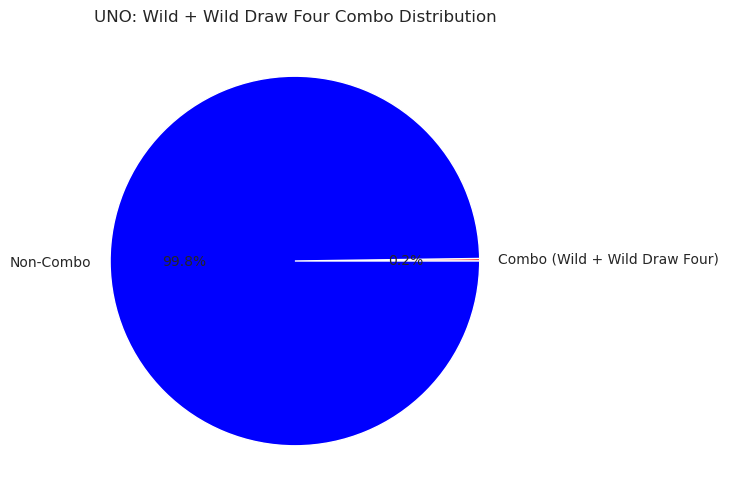

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the summary data
summary_data = pd.DataFrame({
    "Outcome": ["Combo (Wild + Wild Draw Four)", "Non-Combo"],
    "Count": [combo_count, not_combo_count]
})

plt.figure(figsize=(6,6))
plt.pie(summary_data["Count"], labels=summary_data["Outcome"], autopct='%1.1f%%', colors=["red", "blue"])
plt.title("UNO: Wild + Wild Draw Four Combo Distribution")
plt.show()

Answer: The odds for drawing a +4 followed by a wild or a wild followed by a +4 (assuming no other cards have been handed out) theoretically is a 0.27691% chance when you are drawing 2 cards. The empirical data I got, however, was a 0.22% chance. We see from 